## Content

- **DT intuition**
    - Quiz 1 - 4

- **How to split the nodes?**
    - Quiz 5 - 6

- **Entropy**
    - Quiz 7 - 10
    - [All same Y-values](https://www.scaler.com/hire/test/problem/25647/)
    - [50-50 split](https://www.scaler.com/hire/test/problem/25639/)
    - [Decision Tree Entropy](https://www.scaler.com/hire/test/problem/16628/)
    - [Dominant and equiprobable classes](https://www.scaler.com/hire/test/problem/25640/)
    - [Calculate entropy](https://www.scaler.com/hire/test/problem/25764/) h/w

- **Building a DT intuition**
    - Quiz 11 - 13
    - [Let's play tennis](https://www.scaler.com/hire/test/problem/25641/)  h/w → <font color='red'>Used for TT</font>
    - [Information Gain 0](https://www.scaler.com/hire/test/problem/16172/)   h/w
    - [Decision Tree](https://www.scaler.com/hire/test/problem/25757/)
    - [__is used to?](https://www.scaler.com/hire/test/problem/25744/) - Covers DT Regression

- **Visualizing the process of building DT**

- **Scratch impl of DT (optional) - Post read**

- **Sklearn implementation**
    - Quiz 14
    - [Decision Tree Classifier](https://www.scaler.com/hire/test/problem/25806/)
    - [Multiclass classification](https://www.scaler.com/hire/test/problem/25654/)
    - [ Decision Trees Characteristics](https://www.scaler.com/hire/test/problem/16355/)
    - [Find the attribute](https://www.scaler.com/hire/test/problem/25787/)

## Assessment doc

Doc link: https://docs.google.com/document/d/1ZKX5djVoBbCOJvIlv-Qs1i7A1-ekJLBX39lXsfKdvAo/edit?usp=sharing

## UseCase Intro: Employee Attrition
### You are a Data Scientist working at a Jio

- The company is facing a huge problem of employee attrition
- Your task is to help the company find a solution to this problem.

#### Why is attrition a problem?

  - A new employee asks for more compensation
  - Training of new employees
  - Lots of time and resources required for searching a new candidate


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/781/original/Screenshot_2023-07-28_at_11.12.39_AM.png?1690523151 width=700>


#### What can be done to solve the problem ?

1. Identify the employees who may leave in future.
  - Targeted approaches can be undertaken to retain such employees.
  - These might include addressing their problems with the company and so on ...

2. Help identify the key indicators/factors leading to an employee leaving.
  - #### What all reasons can you think of contributing to attrition ?
    - Forcing employees to come to office daily
    - Unhealthy culture etc
  - Identifying these key factors helps in taking better measures to improve employee retention

#### Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: E:\Scaler-Notes-Git\DSML-Notes\M-15 ML-Supervised Algorithms\03 ML Decision Trees-1\HR-Employee-Attrition.csv

  0%|          | 0.00/228k [00:00<?, ?B/s]
100%|##########| 228k/228k [00:00<00:00, 1.10MB/s]
100%|##########| 228k/228k [00:00<00:00, 1.10MB/s]


In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Summary of EDA and Preprocessing

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/782/original/Screenshot_2023-07-28_at_11.12.47_AM.png?1690523216 width=700>

We perform EDA followed by preprocessing on the data which is covered in the post read

#### Post Read - Employee Attrition Usecase

Employee EDA: https://colab.research.google.com/drive/1OdxmAv5q-92ll5Jf8XrDYQp-4-mitgC8?usp=sharing

#### Final dataset after preprocessing

In [5]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: E:\Scaler-Notes-Git\DSML-Notes\M-15 ML-Supervised Algorithms\03 ML Decision Trees-1\preprocessed_X_sm.pickle

  0%|          | 0.00/534k [00:00<?, ?B/s]
 98%|#########8| 524k/534k [00:00<00:00, 2.62MB/s]
100%|##########| 534k/534k [00:00<00:00, 2.66MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: E:\Scaler-Notes-Git\DSML-Notes\M-15 ML-Supervised Algorithms\03 ML Decision Trees-1\X_test.pickle

  0%|          | 0.00/111k [00:00<?, ?B/s]
100%|##########| 111k/111k [00:00<00:00, 864kB/s]
100%|##########| 111k/111k [00:00<00:00, 864kB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: E:\Scaler-Notes-Git\DSML-Notes\M-15 ML-Supervised Algorithms\03 ML Decision Trees-1\y_sm.pickle

  0%|          | 0.00/15.4k [00:00<?, ?B/s]
100%|##########| 15.4k/15.4k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.goog

In [6]:
!pip install pickle4


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pd.read_pickle(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pd.read_pickle(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pd.read_pickle(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pd.read_pickle(handle)

In [8]:
# train data shape
X_train.shape

(1848, 36)

In [9]:
# test data shape
X_test.shape

(368, 36)

In [10]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## DT intuition

Say, we have attrition data with 2 features
- Age
- Overtime

When we plot the data, it looks something like this :

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/783/original/Screenshot_2023-07-28_at_11.12.53_AM.png?1690523246 width=700>







#### Can we use logistic regression to classify this data ?

**No** as it is a **linear model** and we have **non linear data** with us.

- Logistic regression will not perform well in this case.


#### Can we use KNN to solve this problem ?


**Yes** as it works on assumptions that
- neighbourhood should be homogenous
- i.e. datapoints belonging to same class are close to each other.

This assumption is valid here.


#### But, KNN has a big disadvantage


```
Quiz - 1 Try it out

What is the main disadvange of KNN ?

a. It becomes computationally expensive for large datasets
b. Not suitable to handle categorical features
c. Can't be used for regression
d. Non parametric algo so difficult to train.


Ans: a. It becomes computationally expensive for large datasets

```


- We **can't productionize** KNN for large datasets

**Why?**

Because entire training data is used every time we make an inference.

So, it will be difficult to use KNN in this case.


Let's try something else.


Let's try to **split** the data into regions using **axis parallel hyperplanes**

The splitted region  along with decision boundaries will look like :

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/784/original/Screenshot_2023-07-28_at_11.13.00_AM.png?1690523302 width=700>

With the help of these hyperplanes,
- we can represent these **homogenous splitted region** using **if else conditions**

Let's see how it looks like :

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/785/original/Screenshot_2023-07-28_at_11.13.06_AM.png?1690523371 width=700>

Now, that we have the conditions with us

Let's try to represent these conditions digramatically:

Notice that
- This is resembling a **tree structure**

where
- **top most node** is called **root node**
- **Bottom most node** is called **leaf node**
- and **the nodes in between** them are called **Internal node**


This is called a **Decision Tree**



```
Quiz 2 - Check your understanding

Statement I : Topmost node is called leaf node

Statement II: Topmost node is called root node.

Statement III: Bottom most node are called leaf nodes.

Statement IV: Nodes in between root and leaf are called decision nodes/ internal nodes.


Which of the following statements are true ?

a. All statements are true
b. II & IV
c. I & III
d. III & IV


Correction option: d. II & IV
```

#### Visualization

Here's an visualization to help you understand how we use these axis parallel hyperplane to split the data.

https://mlu-explain.github.io/decision-tree/

<center><img src='decision_img.gif' width=800>




Notice that
- how easily it is able to classify multiclass data

- which might have been an overhead if we decided to use logistic regression

#### (Optional) But, Will DT only work when decision boundaries are axis parallel ?

Say, we have the following dataset :

 Rememeber that, in DT
- **each individual hyperplane is axis parallel.**
- the **final decision boundary** which is **made out of combining these hyperplane need not be axis parallel**

Let's see how DT will handle this case:

It will make multiple axis parallel hyperplane to split the region in homogenous subspace.


But, if you were see its effective decision boundary , it'll come out to be :

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/787/original/Screenshot_2023-07-28_at_11.13.19_AM.png?1690524717 width=700>

Whenever we get a datapoint

- Based on the set of rules/ condition
    - we classify it into one of the classes.

**Logically**, it is combination of **nested if else conditions**

**Geomtrically**, it is combination of **axis parallel hyperplanes**.
- and this combination of axis parallel hyperplane helps us in classifying non linear data

```
Quiz 3 - Check your understanding

Which of the following is an advantage of Decision Tree

a. Decision trees can handle multi class classification problems.
b. Decision trees are easily interprtable
c. Decision trees can capture complex nonlinear relationships in the data.
d. All of the above

Ans: d. All of the above
```

#### One of the main advantage of Decision Trees are
  
DTs are **easily interpretable**

**How so?**


  - Let's take an example:
    - One conclusion that can be derived from above decision tree is
      - Employees younger than 29 yrs and work overtime >= 2.5hrs are more likely to churn
    - This can help the company take specific decisions in this direction to reduce attrition such as:
      - Incentivise overtime
      - Reducing workload



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/786/original/Screenshot_2023-07-28_at_11.13.12_AM.png?1690524563 width=700>



If you notice that,
- while building the hyperplanes here
- we were **trying to split** data **into** **homogenous region/ subspace** containing only single class datapoints

```
Quiz-4 Check your understanding

What are we trying to do in Decision Trees?

a. Trying to split data into homogenous regions
b. achieve max possible prediction confidence
c. learn the decision rules from the data
d. All of the above


Correct option: d. All of the above

```

#### What do we need to create these homogenous subspace ?

We need 2 things
- Feature
- Condition to split the data.


We have the features with us.
- We just need to figure out how to find these split conditions.


This is what **learning/ training** means in **decision tree**

Let's learn how to split the data into homogenous regions

# Points to Remember

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/788/original/Screenshot_2023-07-28_at_11.13.28_AM.png?1690524797 width=700>

## How to split the nodes ?

#### But, how do we find these rules ?

- Obviously, we cannot manually create rules for the entire data
- So, we will have to **learn these rules from the data**

<br>

#### What is the end goal of classification ?

Our purpose is to achieve max possible predicition confidence and accuracy


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/789/original/Screenshot_2023-07-28_at_11.13.34_AM.png?1690524836 width=700>


<br>

#### How do decision trees improve predicition confidence ?
  - By dividing heterogenous subspaces into smaller subspaces

We want
  - A homogenous subspace i.e. which contains data belonging to only one class
  
   **Why ?**
    - Confidence of predicition will be maximum in this case

Say, we have a node with following distribution

And we are given with two options to split this node.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/790/original/Screenshot_2023-07-28_at_11.13.41_AM.png?1690524942 width=700>

#### Which option will give us more homogenous (purer) nodes ?


```
Quiz 5 - Try it out


Given the following split options for splitting root node,

Root node : 100 +Ve, 100 -ve datapoint

Option 1:

Left node : 10 +ve, 90 -ve datapoints
Right node : 90 + ve, 10 -ve datapoints


Option 2 :
Left node : 60 +ve, 40 -ve datapoints
Right node : 40 +ve, 60 -ve datapoints

Which option will give us more homogenous nodes ?

a. Option 1
b. Option 2
c. Both will give same homogenous nodes
d. None

```
Correct option: **Option 1**

#### But, why are we looking for pure nodes ?

In order to understand that,

Let's see **how DT assign class label at prediction time**.


During prediction time,
- it predicts the label as the one of majority class at that node.

Let's see with an example:

<center><img src='decision_img.png' width=800>


As we are taking majority vote
- **pure node** will have **more confidence** in the prediction


If we were to pick **option 1**
- We have **purer node** and more homogenous data
- It'll give us **more confidence** in our prediction


<br>

If we were to pick option 2
- There is **less condifence** in the prediction
- i.e. we are 60% confident in our prediction (left child node) that our datapoint belong to positive class
- Hence, node is **impure** and more hetrogenous data


**So, we'll pick option 1 for split.**







#### But, what does confidence here means ?

**Think of condifence as class probability.**

For example:
- In left node,
    - we have datapoints as follows:
        
            +ve class : 10
            -ve class : 90


So, we can say that
- if a datapoint belong to left node
- there is a 90% probability it belongs to -ve class

or class probability is 0.9.


<center><img src='decision_img-2.png' width=800>

**Conclusion**:
- **Purer** the nodes, more **homogenous** the data is.
- **More homogenous** the data in the node is, **more confident** we are about our prediction belonging to specific class.
- **purer** the node, **more the probability** that datapoints belongs to particular class.

```
Quiz- 6 - Check your understanding


Which of the following statement is false ?

a. Purer the node, more confidence we are in our prediction
b. For making prediction, DT takes majority vote of class.
c. More homogenous the data is at the node, more confident we are about our prediction
d. None of the above


Correction option: d. None of the above

```

So, our **objective** is:
- To **split a node** in such a way
    - that we **get purer nodes**


#### But, how do we quantify the purity of the nodes ?

#### How do we calculate purity mathematically ?

We do so using **Entropy**

Let's understand what entropy is

## Entropy

Entropy is used to **measure the impurity** not purity
- i.e. it measures the hetrogenity of the node.


Fun fact:
- The concept of entropy comes from basic probability/ information theory
- where it is used to measure the randomness.

So,

More the hetrogenity in the node,
- larger the value of entropy will be and vice versa.






```
Quiz 7 - Try it yourself

In which of the cases will the entropy be minimum ?

A. A node will all datapoints belonging to one class only
B. Node with datapoints belonging to both class
C. Node with 100 datapoints with one datapoint belonging to positive and rest belonging to other class
D. Entropy is independent of proportion of datapoints in the node.


Ans: A. A node will all datapoints belonging to one class only


```

Since we want the **nodes** to be **pure**,
- we want **entropy** as **low** as possible.

Let's look into the fomulation of Entropy

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/791/original/Screenshot_2023-07-28_at_11.13.48_AM.png?1690524980 width=700>

### Entropy formulation

Say, Y be a **discrete random variable**.

- it can take **k discrete values** i.e y ∈ {$y_1, y_2, y_3, ..., y_k$}


#### How many discrete values of y do we have in employee attrition problem ?

Since, there are **two classes** (churn or stay),
- we have two discrete values for y in this case.

#### What will be the entropy for our binary case classification problem ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/792/original/Screenshot_2023-07-28_at_11.13.54_AM.png?1690525078 width=700>

Let's try to understand entropy for binary class case using an example

Say, we have 4 jars.
- Each jar is filled with balls

Balls are of two colors
- Red ball
- Blue ball



You have been asked to pick a ball from these 4 jars


#### Which jars will give you highest confidence on whether the ball you have picked is red or not ?

Jar 3 and 4 will give us highest confidence.
- As there jars are pure.
- So, we are pretty sure
    - We won't get a red ball in Jar 3
    - And we'll definately get red ball in Jar 4.

- In Jar 1,
    - which is impure (as it has both red and blue balls)
    - we won't have much confidence on whether the ball being picked is red or not.

Let's represent these confidence in numerical terms. i.e. **calculate entropy of each jar**.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/793/original/Screenshot_2023-07-28_at_11.14.01_AM.png?1690525135 width=700>

Notice that
- Jar with equal number of red and blue balls have highest entropy i.e. 1
- Jar with only red balls or blue balls has lowest entropy i.e. 0.




```
Quiz-8 - Check your understanding

Which of the following statements is true ?

a. More the entropy, more pure the node is.
b. Less the entropy, more impure the node is.
c. More the entropy, more homogenous the node is.
d. Less the entropy, more homogenous the node is.


Correct option: d. Less the entropy, more homogenous the node is


Explanation:
- More pure the node is i.e. more homogenous
    - less will be the entropy.

```



` Quiz 9 - Try it yourself`

```
At what probability value will the entropy value be maximum for binary class?

A. 0
B. 0.5
C. 0.33
D. 1


Ans: B. 0.5

```

Let's understand it by plotting the the curve

#### Plotting entropy

Let's plot entropy for binary system and see how it looks like:

Desmos plot: https://www.desmos.com/calculator/avaplvktso

In [11]:
from IPython.display import IFrame

In [12]:
IFrame(src="https://www.desmos.com/calculator/avaplvktso", width=700, height=375)

<img src= https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/794/original/Screenshot_2023-07-28_at_11.14.07_AM.png?1690525169 width=700>

Notice that
- Value of entropy is maximum
    - when the probability is 0.5 i.e. equal number of datapoints for each class
- Entropy value is minimum (Entropy = 0 )
    - when the probability P(Y = 1) is either 0 or 1 (pure node)

#### Visualization for entropy

In case you want to see how entropy changes as number of datapoint changes, here's a visualization for that.

In [13]:
IFrame(src="https://mlu-explain.github.io/decision-tree/", width=700, height=375)

<center><img src='decision_img-3.png' width=800>

**Conclusion:**
- Entropy is **maximum** when the node is **impure** (P(Y =1) = 0.5) i.e. 1
- Entropy is  **minimum** when the node is **pure** i.e. 0
- Entropy lies between 0 and 1.

Now, that we have learnt about purity and how to use entropy to calculate that.

Let's see how Decision Trees uses it for internal working

```
Quiz 10 - Check your understanding

What will the value of entropy for following distribution of datapoints in node:

Positive class: 50
Negative class: 0


Options:
A. 0.33
B. 1
C. -1
D. 0

Answer: D. 0


Explanation:
- Since it is a pure node, it's entropy will be 0 .

```

# Points to Remember

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/795/original/Screenshot_2023-07-28_at_11.14.13_AM.png?1690525211 width=700>

## How Decision Tree works? Building a DT intuition

Let's understand it using a dummy example.


Consider a dataset with 100 datapoints
- and 2 features (Gender , Age < 35 )



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/796/original/Screenshot_2023-07-28_at_11.14.20_AM.png?1690525257 width=700>

#### Can we use this root node for predicition ?

No. We can't. It is highly hetrogenous

Hence, it'll have a high entropy.

Let's calculate its entropy

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/797/original/Screenshot_2023-07-28_at_11.14.27_AM.png?1690525296 width=700>

So, we should split the node in order to reduce the entropy.
- and make it homogenous.

We have two features with us. i.e. Gender and Age < 35.




#### Which feature shall we use for splitting ?

We don't know until we calculate the entropy of split for the feature.




#### Splitting using Gender feature and age<35

Let's first split using Gender feature


When we split using gender
- we get two child nodes
- one for Male
- other for Female.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/798/original/Screenshot_2023-07-28_at_11.14.34_AM.png?1690525348 width =700>

Let's calculate the entropy of child to check whether the entropy has reduced or not

Now that we have calculated entropy of parent as well as both child
- we need to check if there is a reduction in entropy.

But, each child node has an entropy value.
- In order to see the reduction in entropy,
    - we first need to combine the child entropy to get a single value out of it.
    - then we can compare it with parent entropy.

#### How do we combine child entropy ?

```
Quiz 11 - Try it out

Which strategy should we use for combining child entropy?

A. Simple average
B. Weighted average
C. Median of child entropy
D. Maximum of child entropy


Ans: B. Weighted average

```

**Simple average?**

- When we take simple average,
    - we are ignoring the proportions of datapoints belonging to each node

There can be a case where
- Child 1 contains 98 datapoints
- Child 2 contains 2 datapoints

We should include the number of datapoints it is impacting while calculating combined entropy.


So, we should take **weighted average** in this case.



#### How do we calculate weighted entropy of child nodes ?

We simply do so by multiplying the datapoint proportion with its entropy value

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/799/original/Screenshot_2023-07-28_at_11.14.40_AM.png?1690525396 width=700>

There is a slight reduction in weighted child entropy (0.88) compared to parent entropy (0.97)

- So, we are moving towards purer nodes.

This **reduction in entropy** i.e. Parent - weight entropy of child is termed as **Information gain**



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/800/original/Screenshot_2023-07-28_at_11.14.46_AM.png?1690525429 width=700>

We can say that we want to
- **maximize information gain**
- or **minimize entropy**

We want to maximize information gain.

So, there is chance that there is some other feature
- which is providing more information gain than Gender feature

So, we should use that feature instead.

This means we should calculate Information gain for Age < 35 feature as well



```
Quiz 12 - Check your understanding

Which of the following statement related to Information gain is false ?


a. Information gain is defined as reduction in entropy.
b. We want to maximize information gain
c. It is calculated by subtracting weighted child entropy from parent entropy.
d. It is calculated by subtracting parent entropy from weighted child entropy


Correct option : d. It is calculated by subtracting parent entropy from weighted child entropy

```

The information gain for each feature is as follows:

- $I_G(Parent, Age < 35) = 0.257$
- $I_G(Parent, Gender) = 0.091$

#### Which feature shall we pick to split the root node ?

We pick feature s.t it gives us maximum information gain
- In this case, splitting using Age < 35 is giving us maximum information gain.
    - So, we'll pick it to split our root node.

Let's split our node using Age<35 feature

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/801/original/Screenshot_2023-07-28_at_11.14.53_AM.png?1690525534 width=700>

Let's talk about left child node

#### Has the entropy of left child node reduced to 0 or close to 0 ?

No.
- Although the entropy is lower than before
- but it is still an impure node.

In order to achieve more confidence in prediction,
- we should further split this node.




Again, in order to split this node
- we'll calculate information gain using features
- say, these features are gender, salary, years of experience.


Whichever feature gives us the maximum information gain,
- we'll split the node using that feature.

Assume that gender gave us highest info. gain,
- we'll split this node using gender

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/802/original/Screenshot_2023-07-28_at_11.56.08_AM.png?1690525583 width=700>

We continue doing so
- until we get purer nodes
- i.e. confidence in prediction is high.

#### What happens if we have more than 2 categories for a feature ? How do we split in that case ?

In case where there are more than 2 categories in a feature,
- we simply make a child node for each category

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/803/original/Screenshot_2023-07-28_at_11.14.59_AM.png?1690525611 width=700>

```
Quiz 13 - Check your understanding

We calculated information gain for 3 features which is as follows:

Feature 1 : 0.3
Feature 2 : 0.03
Feature 3: 0.2


Which feature would you pick for splitting the node ?

A. Feature 1
B. Feature 2
C. Feature 3

Ans: A. Feature 1


Explanation:
- We want to pick feature which gives us maximum information gain.
- Hence, we'll pick Feature 1

```

## Visualizing the process of building DT



link: https://drive.google.com/file/d/1CBFhQ2bYf81kTN-x_T6B1hcbIVqbXjAz/view?usp=sharing

paper: https://opus.bibliothek.uni-augsburg.de/opus4/frontdoor/deliver/index/docId/79711/file/ECML_PKDD_Decision_Tree_Learning.pdf

Steps to follow:
1. Unzip the file
2. Launch index.html to launch the project
3. Go to Data (top right) -> Import training data -> data.csv

4. Dataset are present in folder named "Files". You can move your custom dataset into that folder. However, there are few limits on number of columns and format of data (csv)

It contains data for attrition use case (3 features)
- Gender
- Age < 35
- Marital Status


4. Select Mode as "Stepwise". It'll build DT node by node.

5. Click on build.

6. Click build again to move to next stage of DT

For each stage, you can view the information gain on left pane of window.




<img src='dtl-1.png' width = 700>


<center><img src='dtl-2.gif' width=800>




Now that we have learnt how decision tree works.

Let's try to implement it from scratch

## (Optional) Post Read - Scratch impl of DT

link : https://colab.research.google.com/drive/1QpgOv1W8x_l81GPN6ebQTb58eqA0RaNm?usp=sharing

## Sklearn implemenation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Fetching data

In [15]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: E:\Scaler-Notes-Git\DSML-Notes\M-15 ML-Supervised Algorithms\03 ML Decision Trees-1\preprocessed_X_sm.pickle

  0%|          | 0.00/534k [00:00<?, ?B/s]
 98%|#########8| 524k/534k [00:00<00:00, 3.06MB/s]
100%|##########| 534k/534k [00:00<00:00, 3.11MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: E:\Scaler-Notes-Git\DSML-Notes\M-15 ML-Supervised Algorithms\03 ML Decision Trees-1\X_test.pickle

  0%|          | 0.00/111k [00:00<?, ?B/s]
100%|##########| 111k/111k [00:00<00:00, 825kB/s]
100%|##########| 111k/111k [00:00<00:00, 825kB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: E:\Scaler-Notes-Git\DSML-Notes\M-15 ML-Supervised Algorithms\03 ML Decision Trees-1\y_sm.pickle

  0%|          | 0.00/15.4k [00:00<?, ?B/s]
100%|##########| 15.4k/15.4k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.goog

In [17]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pd.read_pickle(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pd.read_pickle(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pd.read_pickle(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pd.read_pickle(handle)

#### Reading data

#### Importing sklearn DT


sklearn DT doc - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [18]:
from sklearn.tree import DecisionTreeClassifier

#### Initiating instance

In [19]:
model = DecisionTreeClassifier(criterion='entropy')

#### Fitting the model

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Get the train / test score

In [21]:
model.score(X_test, y_test)

0.7934782608695652

In [22]:
model.score(X_train, y_train)

1.0

```

Quiz 14 - Check your understanding

What does the following model performance say about the model ?

Train accuracy - 1.0
Test accuracy - 0.76


Options
a. Model is underfitting
b. Model is overfitting
c. Model is best fit model
d. None of the above


Correct option:  b. Model is overfitting
```

There is a huge difference in train and test score
- Model is currently overfitting.

#### Visualizing DT

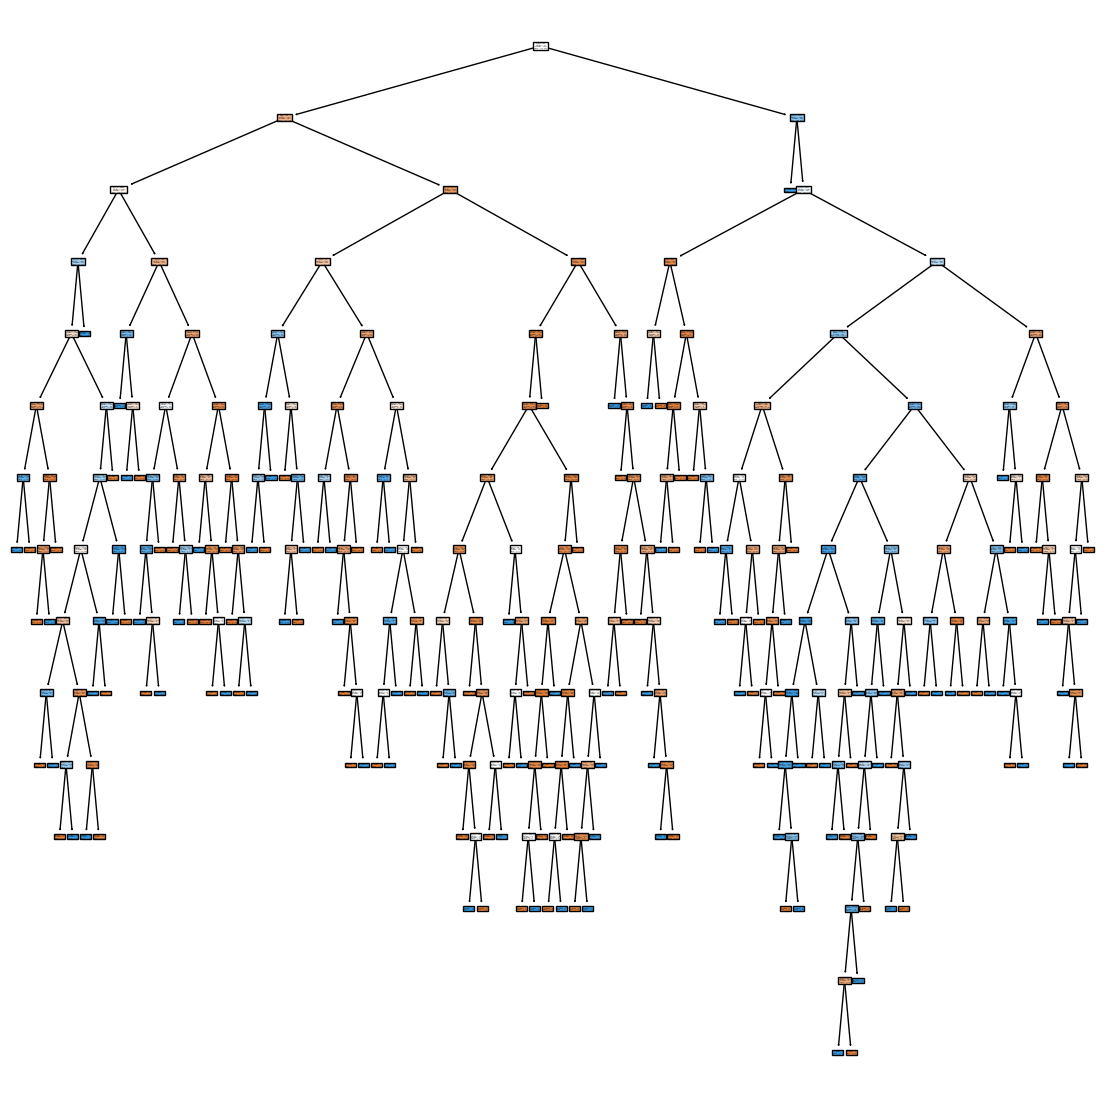

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

Notice that
- how deep is this DT is


#### How do we stop it from overfitting ?

We'll learn about how to handle bias variance tradeoff in DT in next lecture

#Points to Remember

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/804/original/Screenshot_2023-07-28_at_11.15.09_AM.png?1690525651 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/805/original/Screenshot_2023-07-28_at_11.15.18_AM.png?1690525674 width=700>